In [1]:
# Import necessary libraries , kmean, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset
data = pd.read_csv("03_Clustering_Marketing.csv")

In [4]:
# Running head command to see first 6 observations
data.head()

gradyear gender     age  NumberOffriends  basketball  football  soccer  \
0      2007    NaN     NaN                0           0         0       0   
1      2007      F   17.41               49           0         0       1   
2      2007      F  17.511               41           0         0       0   
3      2006      F     NaN               36           0         0       0   
4      2008      F  16.657                1           0         0       0   

   softball  volleyball  swimming  cheerleading  baseball  tennis  sports  \
0         0           0         0             0         0       0       0   
1         0           0         1             0         0       0       0   
2         0           0         0             0         1       0       0   
3         0           0         0             0         0       0       0   
4         0           0         1             0         0       3       0   

   cute  sex  sexy  hot  kissed  dance  band  marching  music  rock  god  \
0     0    0     0    0       0      0     0         0      0     0    0   
1     0    0     0    0       0      0     0         0      0     0    1   
2     0    3     0    0       0      0     0         0      1     2    0   
3     0    0     0    0       0      0     0         0      0     0    0   
4     6    0     2    0       0      0     0         0      1     0    1   

   church  jesus  bible  hair  dress  blonde  mall  shopping  clothes  \
0       0      0      0     0      0       0     0         0        0   
1       0      0      0     0      0       0     0         0        0   
2       1      0      0     4      0       0     1         0        0   
3       0      0      0     0      0       0     0         0        0   
4       1      0      0     5      0       0     0         0        3   

   hollister  abercrombie  die  death  drunk  drugs  
0          0            0    0      0      0      0  
1          0            0    0      0      1      0  
2          0            0    0      0      1      1  
3          0            0    0      0      0      0  
4          0            0    0      0      0      0

In [5]:
# Data description
data.describe()

gradyear  NumberOffriends    basketball      football       soccer  \
count  15000.000000     15000.000000  15000.000000  15000.000000  15000.00000   
mean    2007.496933        29.834533      0.267000      0.255467      0.22200   
std        1.116516        35.386649      0.788851      0.702260      0.92042   
min     2006.000000         0.000000      0.000000      0.000000      0.00000   
25%     2006.000000         3.000000      0.000000      0.000000      0.00000   
50%     2008.000000        20.000000      0.000000      0.000000      0.00000   
75%     2008.000000        44.000000      0.000000      0.000000      0.00000   
max     2009.000000       605.000000     22.000000      9.000000     22.00000   

           softball    volleyball      swimming  cheerleading      baseball  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.159667      0.142933      0.135000      0.105133      0.104133   
std        0.737344      0.638747      0.548691      0.502491      0.519205   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       17.000000     14.000000     31.000000      8.000000     14.000000   

            tennis        sports          cute           sex         sexy  \
count  15000.00000  15000.000000  15000.000000  15000.000000  15000.00000   
mean       0.08820      0.143667      0.328067      0.214600      0.13820   
std        0.53032      0.476209      0.810976      1.277806      0.51191   
min        0.00000      0.000000      0.000000      0.000000      0.00000   
25%        0.00000      0.000000      0.000000      0.000000      0.00000   
50%        0.00000      0.000000      0.000000      0.000000      0.00000   
75%        0.00000      0.000000      0.000000      0.000000      0.00000   
max       15.00000     12.000000     14.000000    114.000000     12.00000   

                hot        kissed         dance          band      marching  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.126600      0.104733      0.430867      0.301933      0.042133   
std        0.470801      0.539305      1.167495      1.075692      0.297261   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       10.000000     26.000000     29.000000     27.000000      9.000000   

              music          rock           god        church         jesus  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.732933      0.245867      0.474933      0.244667      0.112133   
std        1.194475      0.742150      1.335873      0.790810      0.585362   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.000000      0.000000   
max       23.000000     18.000000     52.000000     17.000000     30.000000   

              bible          hair         dress        blonde          mall  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.020800      0.431200      0.116467      0.112867      0.259467   
std        0.212533      1.089287      0.461862      2.708619      0.704398   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.0

In [6]:
# Check for missing values
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [7]:
# Display unique values in 'gender' column
data['gender'].value_counts(dropna=False)

F      11057
M       2606
NaN     1337
Name: gender, dtype: int64

In [8]:
# Replace missing values in the 'gender' column with 'not disclosed'
data['gender'].fillna('not disclosed', inplace=True)

In [9]:
# Check number of missing values in 'gender' column after filling
data['gender'].isnull().sum()

0

In [10]:
# Display unique values in 'gender' column after filling
data['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

In [11]:
# Convert 'age' column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [12]:
# Calculate mean age for each graduation year
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

In [13]:
# Fill missing values in 'age' column with the mean age for each graduation year
data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [14]:
# Check for missing values in 'age' column after filling
data['age'].isnull().sum()

0

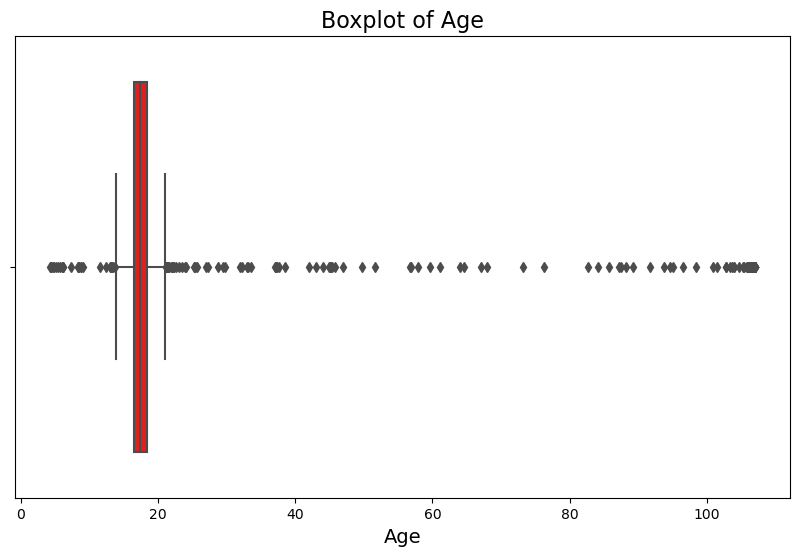

In [15]:
# Visualize age distribution using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['age'], color='red')
plt.xlabel('Age', fontsize=14)
plt.title('Boxplot of Age', fontsize=16)
plt.show()

In [16]:
# Calculate interquartile range for age
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
print(q1)
print(q3)
iqr = q3 - q1
print("Interquartile Range (IQR):", iqr)

16.545
18.400134201954366
Interquartile Range (IQR): 1.855134201954364


In [17]:
# Remove outliers based on age using IQR method
filtered_data = data[(data['age'] > (q1 - 1.5 * iqr)) & (data['age'] < (q3 + 1.5 * iqr))]
outliers_removed = len(data) - len(filtered_data)
print("Number of outliers removed:", outliers_removed)

Number of outliers removed: 176


In [18]:
# Update data to filtered data
data = filtered_data.copy()

In [19]:
# Standardize numeric features
names = data.columns[4:40]
scaled_feature = data.copy()
features = scaled_feature[names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_feature[names] = features

In [20]:
# Map 'gender' to numeric values
def gender_to_numeric(x):
    if x == "M":
        return 1
    if x == "F":
        return 2
    if x == 'not disclosed':
        return 3

scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)

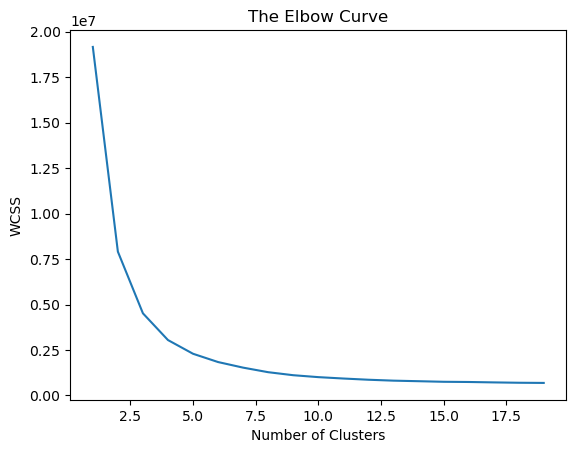

In [21]:
# Creating a function with KMeans to plot "The Elbow Curve"
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS stands for total within-cluster sum of square
plt.show()

In [22]:
# Perform KMeans clustering, impurted missing values handel replace by mean, trnsform fit, add labl  
kmeans = KMeans(n_clusters=4, random_state=0)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(scaled_feature)
model = kmeans.fit(X_imputed)
scaled_feature['cluster'] = model.labels_

In [23]:
# Check the lengths of data and cluster_labels 2 dataset , + length , 
print("Length of data:", len(data))
print("Length of cluster_labels:", len(model.labels_))

Length of data: 14824
Length of cluster_labels: 14824


In [24]:
# Add the 'cluster' column to the DataFrame
data['cluster'] = model.labels_

In [25]:
# Define describe_clusters function 
def describe_clusters(df):
    # Describe cluster characteristics,cluster data group, call , 
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    return cluster_df

# Call describe_clusters function
cluster_df = describe_clusters(data)
print(cluster_df)

Cluster Characteristics:
cluster                    0            1            2            3
gradyear         2007.426137  2007.621011  2007.532660  2007.807927
age                17.472603    17.268437    17.335592    17.085881
NumberOffriends     6.574119    80.138930    37.031156   170.618902
basketball          0.221525     0.343643     0.307048     0.350610
football            0.229981     0.307315     0.274388     0.320122
soccer              0.193594     0.271969     0.250107     0.204268
softball            0.119154     0.237113     0.188440     0.292683
volleyball          0.108648     0.187531     0.175763     0.259146
swimming            0.114926     0.163476     0.156425     0.164634
cheerleading        0.091224     0.149239     0.102492     0.231707
baseball            0.092249     0.144821     0.107434     0.121951
tennis              0.079564     0.112911     0.088096     0.146341
sports              0.128123     0.154148     0.165019     0.152439
cute                0.2

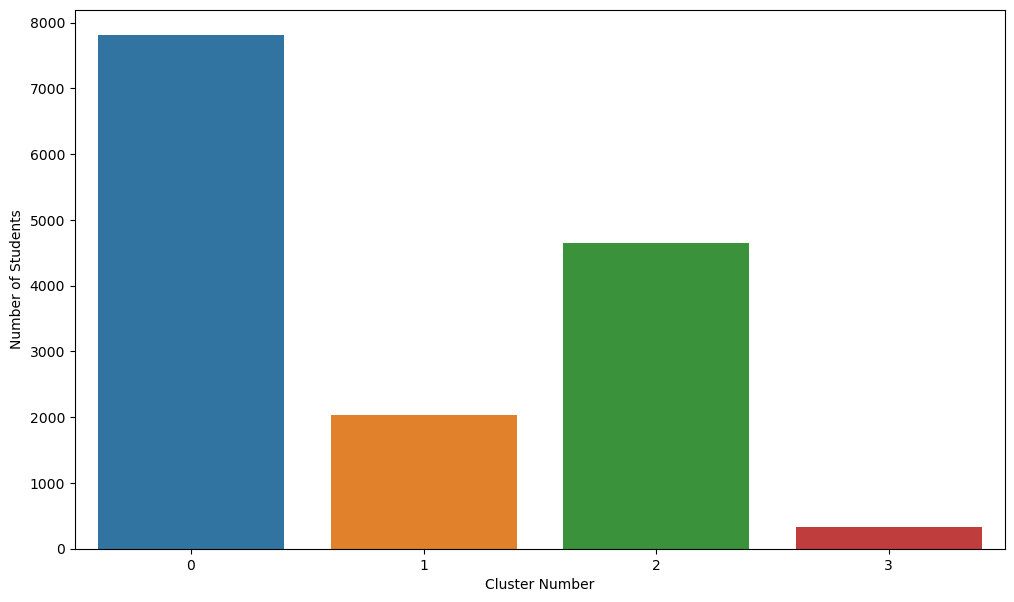

In [26]:
# Visualize cluster sizes
plt.figure(figsize=(12, 7))
axis = sns.barplot(x=np.arange(0, 4, 1), y=data.groupby(['cluster']).size().values)
x = axis.set_xlabel("Cluster Number")
y = axis.set_ylabel("Number of Students")
plt.show()

In [27]:
# Create cluster analysis DataFrame
cluster_analysis = pd.DataFrame({
    'Mean Age': data.groupby('cluster')['age'].mean(),
    'Percentage Female': data[data['gender'] == 'F'].groupby('cluster').size() / data.groupby('cluster').size() * 100,
    'Mean Number of Friends': data.groupby('cluster')['NumberOffriends'].mean(),
    'Number of Students': data.groupby(['cluster']).size()
})

print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
          Mean Age  Percentage Female  Mean Number of Friends  \
cluster                                                         
0        17.472603          70.659833                6.574119   
1        17.268437          78.105056               80.138930   
2        17.335592          76.106575               37.031156   
3        17.085881          84.756098              170.618902   

         Number of Students  
cluster                      
0                      7805  
1                      2037  
2                      4654  
3                       328  


C:\Users\shiva\AppData\Local\Temp\ipykernel_4456\1691937948.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


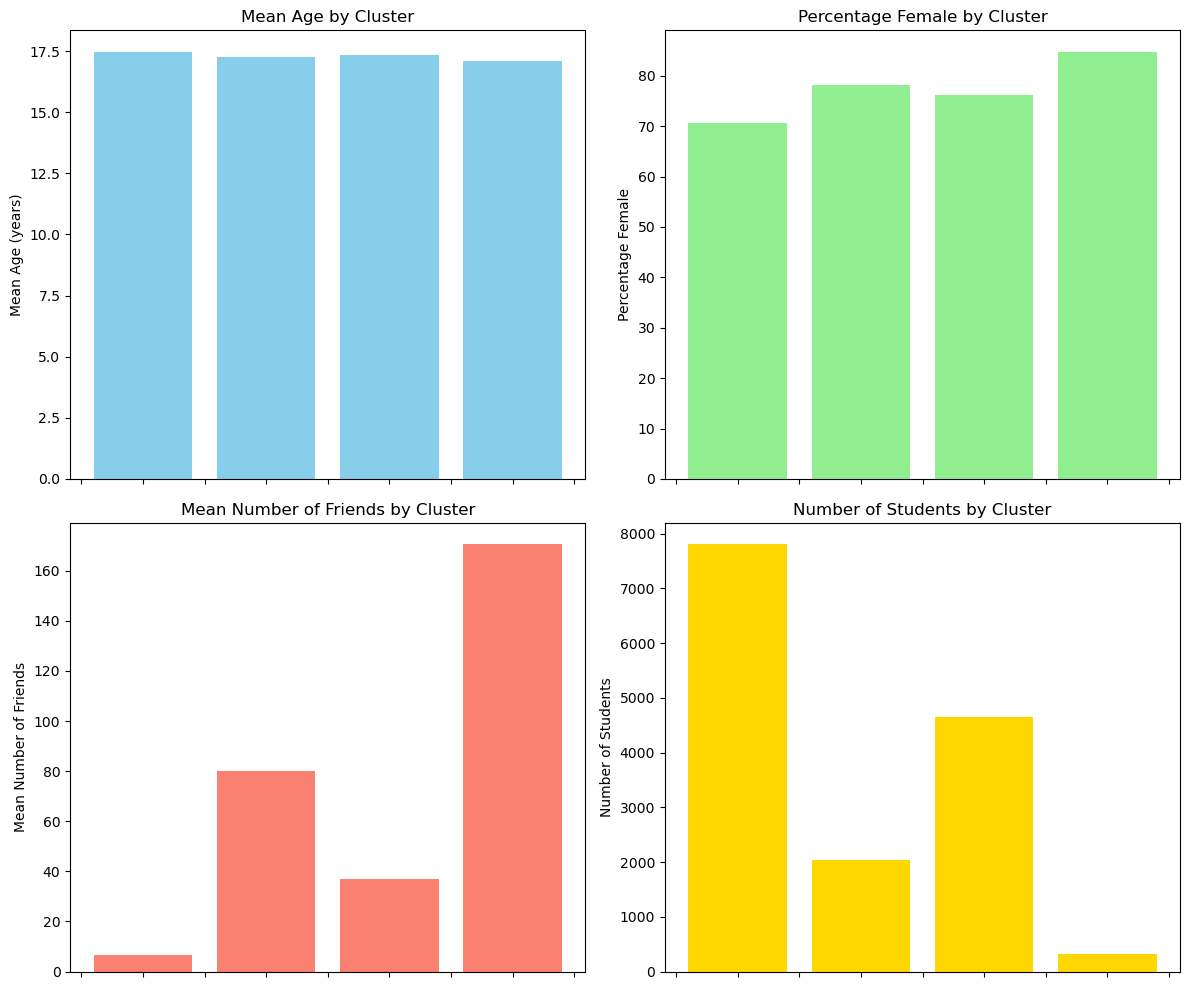

In [28]:
# Visualize cluster characteristics
clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


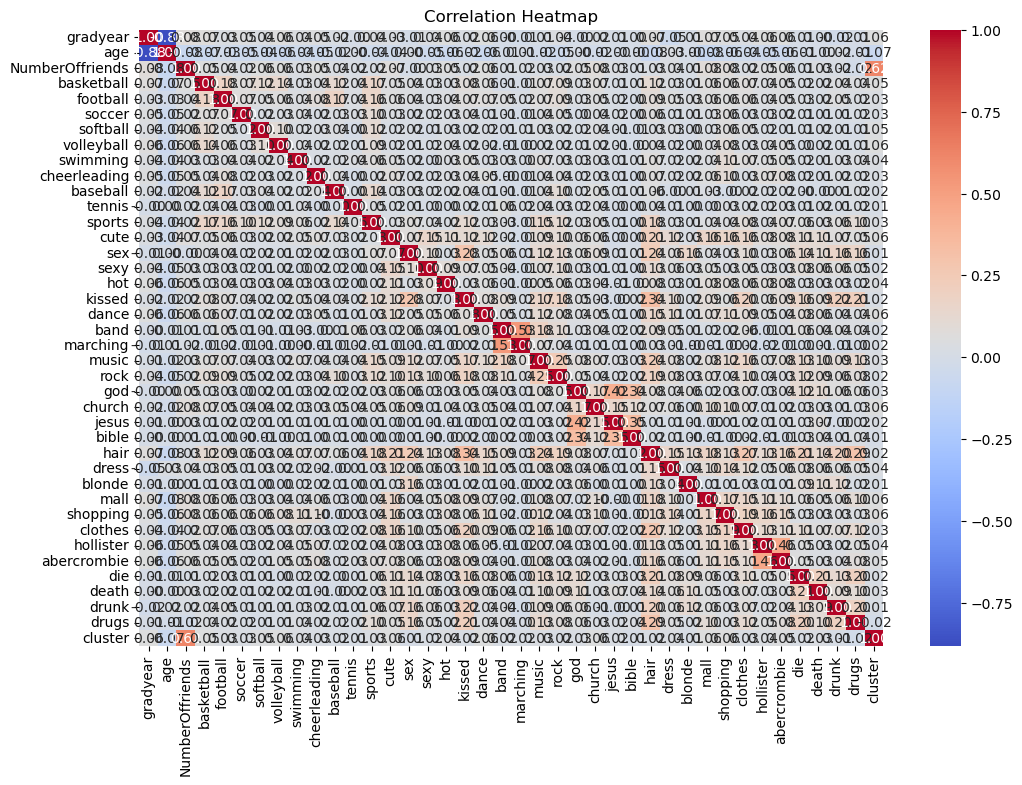

In [29]:
# Additional visualizations

# Pairplot
sns.pairplot(data)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
